In [60]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Рассмотрим простой датасет BeetleFly (https://timeseriesclassification.com/description.php?Dataset=BeetleFly)

In [61]:
### В данном задании нам при помощи KNN и DTW нужно будет построить классификатор, который будет отличать контуры
### жуков от контуров мух (бинарная классификация). Каждое изображение уже преобразовано во временной ряд длины 512.

In [62]:
with open('../data/beetle_fly/BeetleFly_TRAIN.ts') as f:
    data = f.read().split('\n')[11:-1]

In [63]:
X_train = []
y_train = []

In [64]:
for row in data:
    ts, label = row.split(':') 
    ts = np.array(list(map(float, ts.split(','))))
    X_train.append(ts)
    y_train.append(label)

In [65]:
### всего двадцать обьектов обучающей выборки, из них 10 жуков и 10 мух
print(y_train)

['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2']


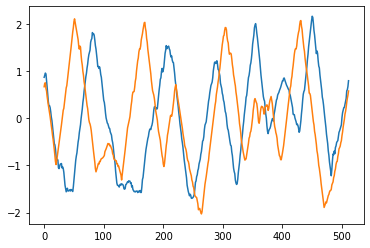

In [66]:
# жуки
plt.plot(X_train[3])
plt.plot(X_train[5])

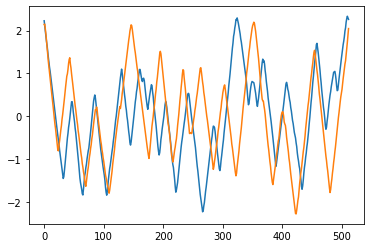

In [67]:
# мухи
plt.plot(X[14])
plt.plot(X[17])

#### Задание: написать реализацию KNN(k=1) используя в качестве меры Dynamic Time Wraping

In [81]:
with open('../data/beetle_fly/BeetleFly_TEST.ts') as f:
    data = f.read().split('\n')[11:-1]

In [82]:
X_test = []
y_test = []

In [83]:
for row in data:
    ts, label = row.split(':') 
    ts = np.array(list(map(float, ts.split(','))))
    X_test.append(ts)
    y_test.append(label)

In [84]:
len(X_test)

20

In [ ]:
<your code here>

#### fastdtw реализация

In [85]:
import fastdtw

In [86]:
ts_test = X_test[3]

In [97]:
y_test[3]

'1'

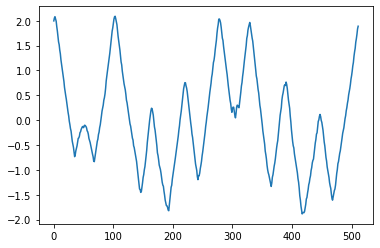

In [87]:
# жук
plt.plot(ts_test)

In [93]:
dtw_values = np.array([fastdtw.fastdtw(ts_test, ts_reference)[0] for ts_reference in X_train])

In [94]:
np.where(dtw_values == min(dtw_values))

(array([9]),)

In [98]:
y_train[9]

'1'

In [122]:
def get_label(ts, X_train, y_train):
    dtw_values = np.array([fastdtw.fastdtw(ts, ts_reference)[0] for ts_reference in X_train])
    np.where(dtw_values == min(dtw_values))
    idx = np.where(dtw_values == min(dtw_values))[0][0]
    label = y_train[idx]
    return label

In [123]:
for i in range(0, 19):
    print(get_label(X_test[i], X_train, y_train))

1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
2


In [124]:
13/20

0.65